<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/notebooks/10-Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Module

This notebook/module is intended for every individual who have a principal interest or need to apply Data Science concepts and Machine Learning algorithms in their field. All the information on this module is based on "Data Mining: The Text Book" by Charu C. Aggarwal.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Module" data-toc-modified-id="Machine-Learning-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning Module</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Data-Exploratory-Analysis" data-toc-modified-id="Data-Exploratory-Analysis-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression-with-three-variables-(attributes/features)" data-toc-modified-id="Multiple-Linear-Regression-with-three-variables-(attributes/features)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Multiple Linear Regression with three variables (attributes/features)</a></span></li><li><span><a href="#Multiple-Linear-Regression-with-more-than-three-variables" data-toc-modified-id="Multiple-Linear-Regression-with-more-than-three-variables-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Multiple Linear Regression with more than three variables</a></span></li></ul></li></ul></li></ul></div>

### Imports
Import libraries

In [ ]:
import pandas as pd # Data manipulation
import numpy as np # Matrix operations 
import statsmodels.formula.api as smf # Statistics
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.style as style 
from pandas.plotting import scatter_matrix 
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Wrangling

Data wrangling is the process where you manipulate the data in your favour, without dismissing any value and mantaining the "sense and meaning" of the data set. In this step, you analyze your data to find and replace missing values acording to different techniques, clean the data, and transform it. 


### Data Exploratory Analysis

Data Explotary Analysis (EDA), is a process perform to get insights about what your data is trying to say. This includes visualizing the data, finding the correlations, knowing the amount of missing values, which attributes does not have a big weight on the outcome, etc. 

In the following step, we use Pandas module to read our csv file, where our data is stored. There are many ways to export and/or read our data, from JSON, CSV, Text files, to SQL and Databases queries. Depending where your data is coming from, it dictates the way you are going to read it. 

Here we have an example of multi-dimensional data, a commun Data Frame which consists of rows and columns. Each column is an attribute, as you can see that each one is named. Each row is a different item that contains all the attributes established by the columns. You can perform the function .head() every time you want to display the first rows of your data frame. 

For the purpose of this analysis, we are using a Pollution data set. Please visit the site where the data set is located to get an insight of the variables and what they represent. 

In [ ]:
data = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/pollution.data.txt", delimiter="\s+")



data.columns = ["PREC", "JANT", "JULT", "OVR", "POPN", "EDUC", "HOUS", "DENS", "NONW", "WWDRK", "POOR", "HC", "NOX", "SOA", "HUMID", "MORT" ]

data.head()


,PREC,JANT,JULT,OVR,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SOA,HUMID,MORT
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.87
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.88
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.35
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.29
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.29


Now, the method .head() allows you to visualize the first 5 rows of the data. You can change that by writing a number inside the parenthesis.
Try it in the next cell.


In [ ]:
data.head( 20 )  #Put any number inside the parenthesis

,PREC,JANT,JULT,OVR,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SOA,HUMID,MORT
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.87
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.88
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.35
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.29
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.29
5,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1030.38
6,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,934.70
7,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,899.53
8,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1001.90
9,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,912.35


Now, we check the statistics of our data set with the .describe method that the module Pandas provide. 

In [ ]:
data.describe()

,PREC,JANT,JULT,OVR,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SOA,HUMID,MORT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,37.850000,22.65000,53.766667,57.666667,940.358500
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,91.977673,46.33329,63.390468,5.369931,62.206685
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.00000,1.000000,38.000000,790.730000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.00000,11.000000,55.000000,898.370000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.00000,30.000000,57.000000,943.685000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.75000,69.000000,60.000000,983.205000
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.00000,278.000000,73.000000,1113.160000


Checking if there is any missing values 

In [ ]:
data.isna().sum()

PREC     0
JANT     0
JULT     0
OVR      0
POPN     0
EDUC     0
HOUS     0
DENS     0
NONW     0
WWDRK    0
POOR     0
HC       0
NOX      0
SOA      0
HUMID    0
MORT     0
dtype: int64

In this case, our data seems clean, by now. There are no missing values. The following step is to visualize our data to find correlations and possible outliers. For that, we create a correlation matrix. In our data set, we are interested in the attribute 'MORT', which represents the mortality of the poblation. Therefore, the correlation matrix will help us identify the variables that have a high weight and influence on the mortality attribute. 

The function .corr() creates a correlation matrix, which is an analysis of how each variable correlate which each other. After calling the function, it will be stored in a data frame.


In [ ]:
corr_matrix = data.corr()    # Call the .corr() function on data

corr_matrix["MORT"].sort_values(ascending=False)

MORT     1.000000
NONW     0.643742
PREC     0.509500
SOA      0.425898
POOR     0.410490
POPN     0.357307
JULT     0.277018
DENS     0.265503
JANT    -0.030022
NOX     -0.077382
HUMID   -0.088501
OVR     -0.174593
HC      -0.177242
WWDRK   -0.284805
HOUS    -0.426821
EDUC    -0.510988
Name: MORT, dtype: float64

By the correlation matrix, we observe that the NONW (Non-White Population) and PREC (Annual Precipitation) attributes are highly correlated to the mortality. In the next cell, we perform an scatter matrix to verify our observations. 

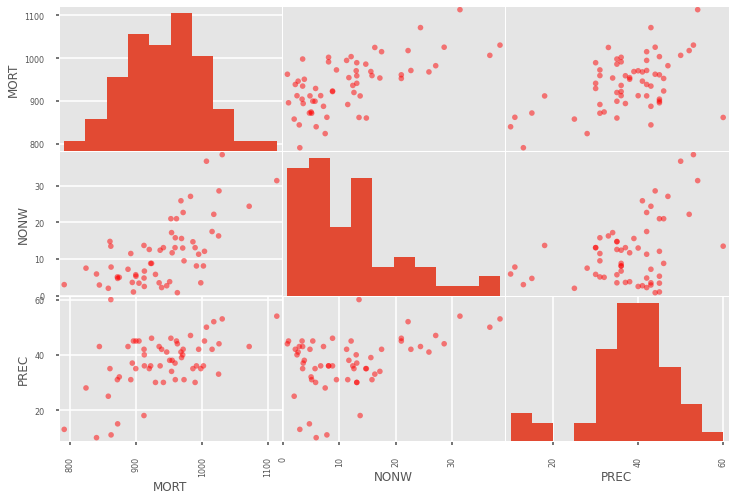

In [ ]:


style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')


attributes = ["MORT", "NONW", "PREC"]

scatter_matrix(data[attributes], figsize=(12,8), color='red');

Now, do your own visualization. You can change the color in the color area, by writing green, pink, or the color you wish. You can also change the figsize, that is the size of the chart.

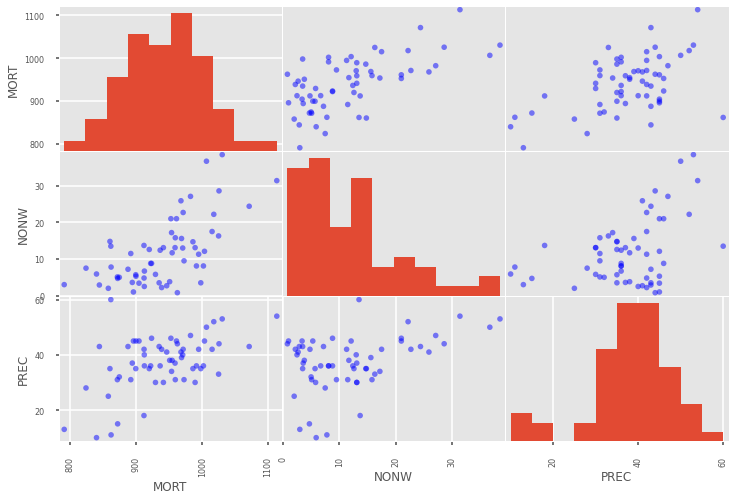

In [ ]:

scatter_matrix(data[attributes], figsize=(12,8), color='blue');  # Pick a color of your choice

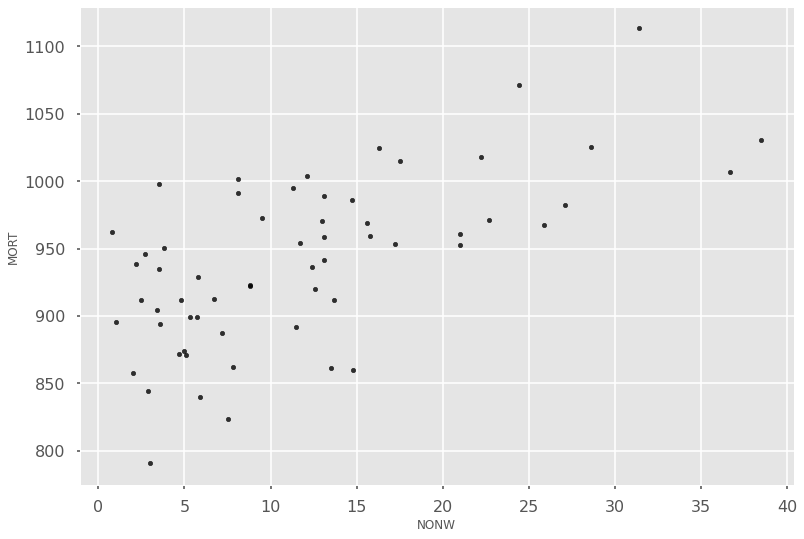

In [ ]:
data.plot(kind="scatter", x="NONW", y="MORT", alpha=0.8, color='black')

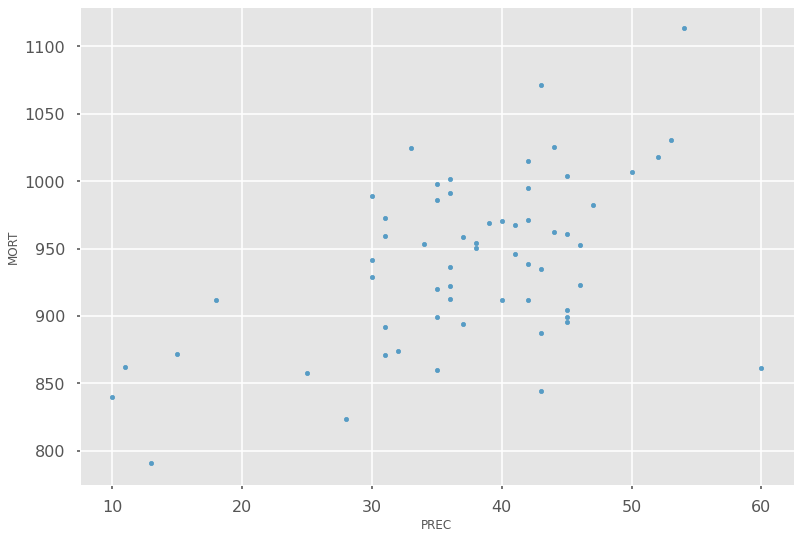

In [ ]:
data.plot(kind="scatter", x="PREC", y="MORT", alpha=0.8)

From the previous visualizations, we observe that indeed there is a high correlation between the variables and we see a few outliers distanced of the focus group. 

In [ ]:
data1 = [data["NONW"], data["MORT"]]
data1 = np.transpose(data1)
data1 = pd.DataFrame(data1, columns=["NONW", "MORT"])

data1.head()


,NONW,MORT
0,8.8,921.87
1,3.5,997.88
2,0.8,962.35
3,27.1,982.29
4,24.4,1071.29


## Linear Regression 



Machine Learning is mainly divided in two sections: Regression and Classification. Of course, there are others as Essemble Methods, Recommendation Systems and further. For the scope of this module, we are going to focus on the two section algorithms we previously mentioned. 

We start modeling with Linear Regression. Linear Regression is a model that takes continuous values and implements a linear function to follow the behavior/pattern of the data. Basically, it takes each point and using a loss function, reduces the error to get a better approximation of the linear function parameters. It is a linear approach to model the relationship between a dependent variable (target variable) and one (simple regression) or more (multiple regression) independent variables. Python has different libraries that allow us to plot a data set and analyze the relation between variables. In case we observe a linear trend, we can calculate the line that better fits our data and make predictions using this line. Additionally, we can measure the strength of the relationship between two variables using correlation coefficients as well as the quality of the regression model using the mean square error. 

In [ ]:
result = smf.ols(formula="MORT ~ NONW", data=data1).fit()
print(result.params)

Intercept    887.076721
NONW           4.488777
dtype: float64


Text(0.5, 1.0, 'Relationship between Non-White Population and Mortality')

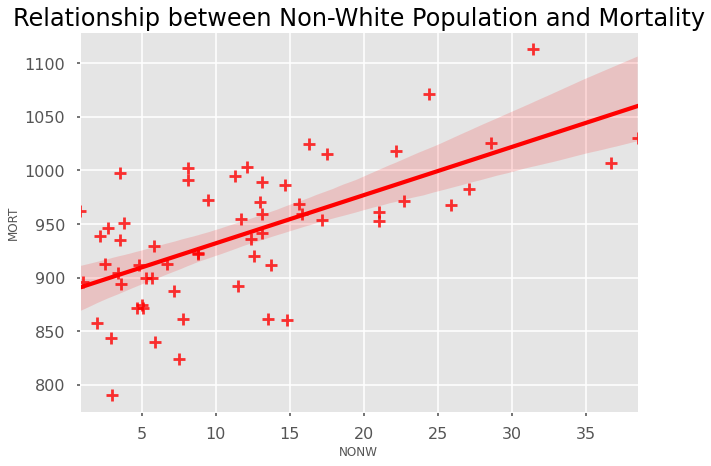

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.regplot(x=data.NONW  ,   y=data.MORT  ,  color='red', marker='+') # Complete x and y variables by writing the needed variables
plt.title('Relationship between Non-White Population and Mortality', size=24)

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     41.04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           2.89e-08
Time:                        22:55:56   Log-Likelihood:                -316.41
No. Observations:                  60   AIC:                             636.8
Df Residuals:                      58   BIC:                             641.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    887.0767     10.372     85.523      0.000     866.314     907.839
NONW           4.4888      0.701      6.407      0.000       3.086       5.891
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.587
Skew:                          -0.109   Prob(JB):                        0.746
Kurtosis:                       2.567   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*** From the previous graph, we can observe the pattern in the data points and how the slope escalate up. The zone shaded in red is called the confidence interval, that means that the data points can vary within that range. ***

## Multiple Linear Regression 

***Simple linear regression uses a linear function to predict the value of a target variable y, containing the function only one independent variable x₁.***

    y = b₀ + b₁x₁

***After fitting the linear equation to observed data, we can obtain the values of the parameters b₀ and b₁ that best fits the data, minimizing the square error.***

<img src="multiple.png"></img>

***Multiple linear regression uses a linear function to predict the value of a target variable y, containing the function n independent variable x=[x₁,x₂,x₃,…,xₙ].***

    y =b₀+b₁x₁+b₂x₂+b₃x₃+…+bₙxₙ

***We obtain the values of the parameters bᵢ, using the same technique as in simple linear regression (least square error). After fitting the model, we can use the equation to predict the value of the target variable y.***

### Multiple Linear Regression with three variables (attributes/features)

In [ ]:
result = smf.ols(formula="MORT ~ NONW + PREC ", data=data).fit()  # Write NONW and PREC variables to predict the MORT
print(result.params)

Intercept    828.759654
NONW           3.642731
PREC           1.829428
dtype: float64


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     26.94
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           5.82e-09
Time:                        22:59:20   Log-Likelihood:                -312.50
No. Observations:                  60   AIC:                             631.0
Df Residuals:                      57   BIC:                             637.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    828.7597     22.915     36.167      0.000     782.873     874.646
NONW           3.6427      0.727      5.009      0.000       2.187       5.099
PREC           1.8294      0.650      2.816      0.007       0.528       3.131
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.287
Skew:                          -0.165   Prob(JB):                        0.867
Kurtosis:                       3.080   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression with more than three variables 

In [ ]:
regall=smf.ols(formula='MORT~PREC+NONW+     ',data=data).fit() # Choose another variable besides PREC and NONW to predict MORT
regall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     15.73
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.96e-12
Time:                        06:54:22   Log-Likelihood:                -289.33
No. Observations:                  60   AIC:                             600.7
Df Residuals:                      49   BIC:                             623.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1791.2106    361.983      4.948      0.000    1063.778    2518.643
PREC           1.8339      0.837      2.190      0.033       0.151       3.517
JANT          -2.0814      0.718     -2.899      0.006      -3.524      -0.639
JULT          -3.2390      1.399     -2.315      0.025      -6.050      -0.428
OVR           -9.6536      7.246     -1.332      0.189     -24.216       4.909
POPN        -113.7670     64.144     -1.774      0.082    -242.668      15.134
EDUC         -20.6110      7.585     -2.717      0.009     -35.854      -5.368
DENS           0.0035      0.003      1.013      0.316      -0.003       0.011
NONW           4.6163      0.970      4.760      0.000       2.668       6.565
HC            -0.8804      0.322     -2.736      0.009      -1.527      -0.234
NOX            1.7724      0.617      2.872      0.006       0.532       3.012
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.724
Skew:                           0.197   Prob(JB):                        0.696
Kurtosis:                       3.366   Cond. No.                     3.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred=regall.predict(pd.DataFrame({'PREC': [47], 'JANT':[35], 'JULT': [74], 'OVR': [10.4], 'POPN': [3.21], 'EDUC': [11.0], 'DENS': [6441], 'NONW': [27.1], 'HC': [8], 'NOX': [38]}))
print("Predicted MORT:",pred[0])

Predicted MORT: 1080.665913424038


# Credits

This material has been made available by [Guillermo Fidalgo](https://github.com/GuillermoFidalgo) for educational purposes.
Please feel free to copy and teach with this material, I only ask for appropiate credit.